# Detailed walkthrough of COCOAPI (via pycocotools)
link to class: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

## load data

In [2]:
dataDir='/Users/mendeza/Documents/datasets/coco_dataset/'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


# There are multiple data structures that define COCO:
* coco.anns: dictionary of annotations
* coco.imgs: dictionary of images
* coco.cats: dictionary of categories
* coco.catToImgs: dictionary that maps and informs which images have this category
* coco.imgToAnns: dictionary that maps image_id to annotations

## Elements in COCO Annotation
* area: size of an Annotation
* bbox: bounding box of object in image
* category_id: id of category that label of object (i.e. 25 corresponds to giraffe)
* id: unique id of Annotation
* iscrowd: ?
* segmentation: array of 2D pixel coordinates (i.e. polygon) that defines segmentation mask

# Example of a COCO Annotation

In [89]:
from pprint import pprint
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break

{'area': 702.1057499999998,
 'bbox': [473.07, 395.93, 38.65, 28.67],
 'category_id': 18,
 'id': 1768,
 'image_id': 289343,
 'iscrowd': 0,
 'segmentation': [[510.66,
                   423.01,
                   511.72,
                   420.03,
                   510.45,
                   416.0,
                   510.34,
                   413.02,
                   510.77,
                   410.26,
                   510.77,
                   407.5,
                   510.34,
                   405.16,
                   511.51,
                   402.83,
                   511.41,
                   400.49,
                   510.24,
                   398.16,
                   509.39,
                   397.31,
                   504.61,
                   399.22,
                   502.17,
                   399.64,
                   500.89,
                   401.66,
                   500.47,
                   402.08,
                   499.09,
                   401.87,


## Elements in COCO Category
* supercategory: supercategory that encapsulates category (i.e. giraffe is an Animal, supercategory = Animal)
* id: integer that corresponds to category
* name: english word that defines category (25 is giraffe)

## Example of COCO Category

In [90]:
coco.cats[25]

{'supercategory': 'animal', 'id': 25, 'name': 'giraffe'}

## Elements in COCO Image
* 'coco_url'
* 'date_captured': '2013-11-14 17:02:52',
* 'file_name': '000000397133.jpg',
* 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
* 'height': 427,
* 'id': 397133,
* 'license': 4,
* 'width': 640}

## Example of COCO Image 

In [92]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'date_captured': '2013-11-14 17:02:52',
 'file_name': '000000397133.jpg',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'height': 427,
 'id': 397133,
 'license': 4,
 'width': 640}


In [42]:
# get all coco categories
coco.getCatIds()[:5]# get ids of categories

[1, 2, 3, 4, 5]

In [45]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds())[:5]# returns dictionary

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]

In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person sports food outdoor appliance furniture vehicle electronic indoor accessory kitchen animal


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [6]:
catIds

[1, 18, 41]

In [94]:
coco.cats[41]

{'supercategory': 'sports', 'id': 41, 'name': 'skateboard'}

In [7]:
# image_id 324158 has objects that contain all three categories (person(1), dog(18), skateboard(41))
imgIds

[324158]

In [95]:
# another example to get category ids that correspond to objects of interests
coco.getCatIds(catNms=['carrot','cake','chair'])

[57, 61, 62]

In [10]:
# get images that have all category ids
coco.getImgIds(catIds=[57, 61, 62] )

[435081, 350148]

# Given you have either
*  A. Category Id
* B. Image ID, or 
* C. an annotation ID
## you can use these function to get the actual coco item for training, etc
*  loadAnns   - Load anns with the specified ids.
*  loadCats   - Load cats with the specified ids.
*  loadImgs   - Load imgs with the specified ids.

In [28]:
im = coco.loadImgs(350148)[0]

In [96]:
pprint(im)

{'coco_url': 'http://images.cocodataset.org/val2017/000000350148.jpg',
 'date_captured': '2013-11-20 01:38:20',
 'file_name': '000000350148.jpg',
 'flickr_url': 'http://farm4.staticflickr.com/3434/3275441569_eee9434daf_z.jpg',
 'height': 640,
 'id': 350148,
 'license': 4,
 'width': 480}


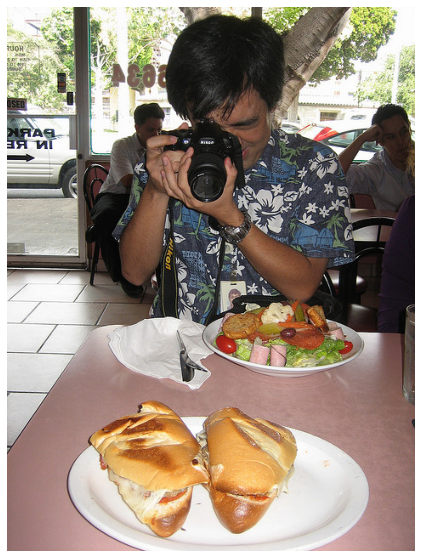

In [30]:
I = io.imread(im['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

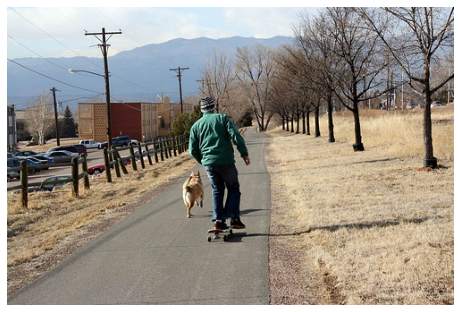

In [32]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[10673, 638724, 2162813]


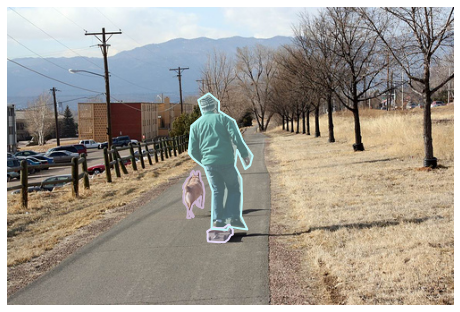

In [64]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=False)

[10673, 638724, 2162813]


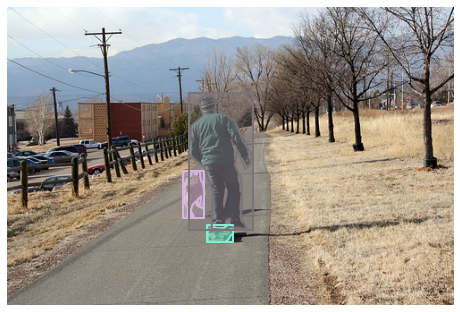

In [97]:
# load and display instance annotations (with bounding box)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=True)

{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


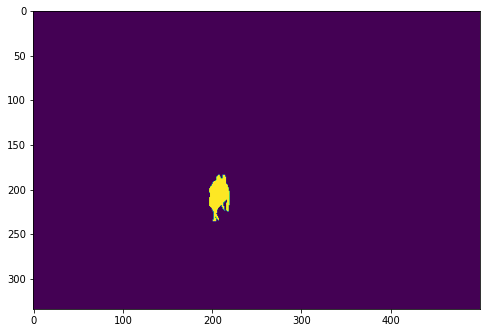

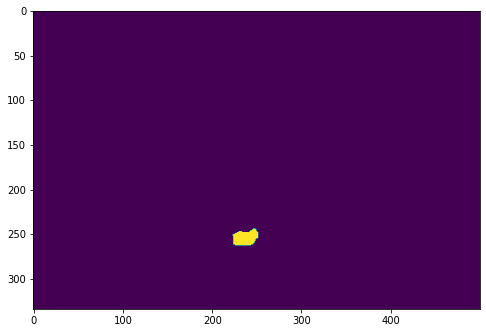

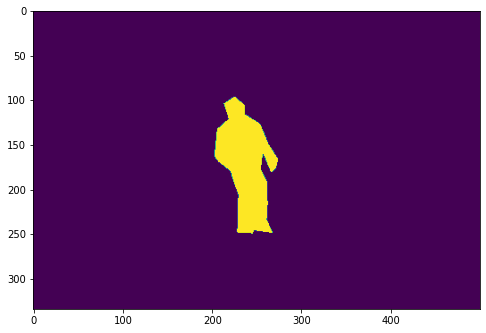

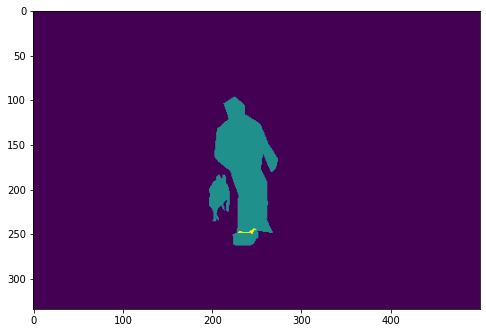

In [98]:
# get binary mask from annotation ids
ann = coco.loadAnns([10673, 638724, 2162813])
# print(ann)
# print(ann['image_id'])
print(coco.imgs[ann[0]['image_id']])
m = np.zeros((334,500))
for a in ann:
    mask = coco.annToMask(a)
    plt.imshow(mask)
    plt.show()
    m+=mask
plt.imshow(m)

# Loading and Visualizing COCO Keypoint Annotations

In [34]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


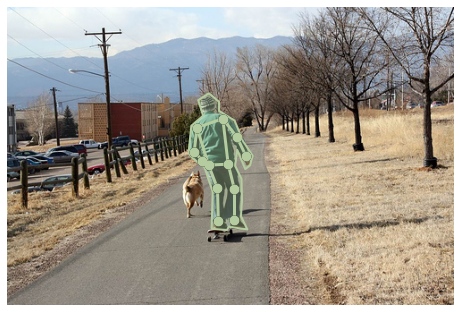

In [36]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

# Load COCO api for caption annotations


In [37]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


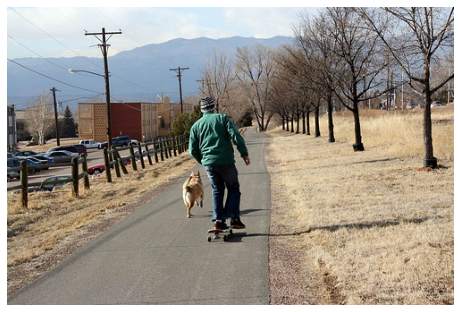

In [38]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

# ToDo
* How to create custom data in COCO format??